**Задание 5, Вариант #29**

In [1]:
import numpy
import math
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

Задано изображение: $1/(p^{2/3} - 1)$

In [2]:
p = sp.symbols('p')
f_symbol = 1.0 / (sp.Pow(p, 2.0 / 3) - 1)

Вычисление производных изображения:

In [3]:
def f_derivative(n, p_):
    return sp.lambdify(p, sp.diff(f_symbol, p, int(n)))(p_)

Слагаемые ряда функции-оригинала:

In [4]:
def series_elem(n, t):
    if n % 2 == 0:
        return -(t ** (- 1.0 / 2 + ((n-1)//2)/2)) / math.gamma(1 / 2 + ((n-1)//2)/2)
    return (t ** (- 5.0 / 6 + (n//2)/2)) / math.gamma(1.0 / 6 + (n//2)/2)

Определение операторов Виддера:

In [5]:
def w_n(n, t):
    p = float(n) / t
    sign = -1
    if (n % 2 == 0):
        sign = 1
    return sign * float(p ** (n + 1)) / math.factorial(n) * f_derivative(n,p)

In [6]:
def dj(k, n):
    d_j = [float(j) / n for j in range(1, k + 1)]
    return d_j

Строим таблицу для обращения преобразования Лапласа методом Виддера с ускорением сходимостии без него, а так же строим оригинал в виде ряда

In [7]:
def ckj(n, k):
    d_j = dj(k, n)
    c_k_j = []
    for j in range(1, k + 1):
        ans = 1
        for i in range(1, n + 1):
            if i != j:
                ans *= d_j[j - 1] / (d_j[j - 1] - d_j[i - 1])
        c_k_j.append(ans)
    return c_k_j

Метод Виддера:

In [8]:
def simple_widder(n, t):
    return w_n(n, t)

In [9]:
def advanced_widder(n, k, t):
    d_j = dj(k, n)
    c_k_j = ckj(n, k)
    ans = 0
    for j in range(1, k + 1):
        ans += c_k_j[j - 1] * w_n(n * d_j[j - 1], t)
    return ans

In [10]:
def series(n, t):
    ans = 0
    for i in range(1, n + 1):
        ans += series_elem(i, t)
    return ans

In [11]:
t = 0.5
result = numpy.zeros((15, 3))
for i in range(1, 16):
    result[i - 1][0] = simple_widder(i, t)
    result[i - 1][1] = advanced_widder(i, i, t)
    result[i - 1][2] = series(i, t)
df = pd.DataFrame(result, index=[n for n in range(1, 16)],
columns=['Метод Виддера', 'Ускоренный метод Виддера', 'Разложение в ряд'])

Сравнение значений методов в точке t=0.5

In [12]:
df

,Метод Виддера,Ускоренный метод Виддера,Разложение в ряд
1,6.134172,6.134172,0.320104
2,3.700188,1.266204,-0.477781
3,3.258522,2.929683,0.452656
4,3.074328,2.581173,-0.547344
5,2.973356,2.633309,0.412966
6,2.909613,2.627241,-0.384918
7,2.865718,2.627818,0.312909
8,2.833651,2.627772,-0.187091
9,2.809200,2.627775,0.224471
10,2.789939,2.627775,-0.041491


Графики оригиналов, полученных методами, на интервале (2;3) при n=20

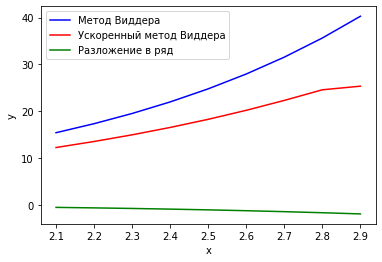

In [13]:
n = 20

def y1(x):
    return simple_widder(n,x)

def y2(x):
    return advanced_widder(n,n,x)

def y3(x):
    return series(n,x)

x = [2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9]
f1 = [y1(ii) for ii in x]
f2 = [y2(ii) for ii in x]
f3 = [y3(ii) for ii in x]

fig, ax = plt.subplots()                        
ax.plot(x, f1, color="blue", label="Метод Виддера")
ax.plot(x, f2, color="red", label="Ускоренный метод Виддера")    
ax.plot(x, f3, color="green", label="Разложение в ряд")  
ax.set_xlabel("x")                              
ax.set_ylabel("y")                             
ax.legend()                                     

plt.show()

In [14]:
fig.savefig('widder graph')